# Assignment4
HE XIANTAO 1155132173

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
ROOT_FOLDER = './gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/'

import glob
print('\nContents in the data folder:')
for x in glob.glob(ROOT_FOLDER+'data/*'):
    print(x)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/

Contents in the data folder:
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/data/imgs1.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/data/imgs2.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/data/kpts1.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/data/kpts3.npy
./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/data/README.txt


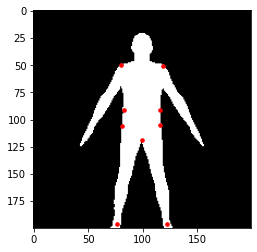

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_points(image, kpts):
    plt.figure()
    plt.imshow(image, cmap='gray')
    keypoints = kpts
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')

# load front view data
IMG_SIZE = 200
IMG_TRAIN = np.load(ROOT_FOLDER+'data/imgs1.npy')
IMG_TRAIN = np.unpackbits(IMG_TRAIN).reshape((-1,IMG_SIZE,IMG_SIZE))
KPT_TRAIN = np.load(ROOT_FOLDER+'data/kpts1.npy')

# show one
idx = 5
draw_points(IMG_TRAIN[idx,:,:], KPT_TRAIN[idx,:,:])

# Task 1: Keypoint Detection
• Train a keypoint detection model. – The same as Assignment #2. Any models besides neural networks can be used.

• Training data: imgs1.npy and kpts1.npy. • Predict keypoints for images in imgs2.npy.

# Create X and y label

In [3]:
KPT_TRAIN_X=KPT_TRAIN[:,:,0]
KPT_TRAIN_y=KPT_TRAIN[:,:,1]
print(KPT_TRAIN_X.shape)
print(KPT_TRAIN_y.shape)

(1000, 9)
(1000, 9)


# Transform the shape of attributes
transform (1000,200,200) to (1000,40000)

In [4]:
import numpy as np
IMG_TRAIN_transform=np.reshape(IMG_TRAIN,(1000,-1))
print(IMG_TRAIN_transform.shape)

(1000, 40000)


# Load test data and do transform

In [5]:
IMG_TEST = np.load(ROOT_FOLDER+'data/imgs2.npy')
IMG_TEST = np.unpackbits(IMG_TEST).reshape((-1,IMG_SIZE,IMG_SIZE))
IMG_TEST_transform=np.reshape(IMG_TEST,(1000,-1))
print(IMG_TEST_transform.shape)

(1000, 40000)


# Linear Regression
use linear regression to predict X,y coordinate

each coordinate do 9 times

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
idx=0
predict_matrix=np.empty((1000,2))
predict_LR=np.empty((9,1000,2))
while idx < 9:
  reg_X = LinearRegression().fit(IMG_TRAIN_transform, KPT_TRAIN_X[:,idx])
  reg_y = LinearRegression().fit(IMG_TRAIN_transform, KPT_TRAIN_y[:,idx])
  predict_X=reg_X.predict(IMG_TEST_transform)
  predict_y=reg_y.predict(IMG_TEST_transform)
  predict_matrix[:,0]=predict_X[:]
  predict_matrix[:,1]=predict_y[:]
  predict_LR[idx,:,:]=predict_matrix
  kfold=KFold(n_splits=3,shuffle=True, random_state=0)
  X_scores=cross_val_score(reg_X,IMG_TRAIN_transform,KPT_TRAIN_X[:,idx],cv=kfold)
  y_scores=cross_val_score(reg_y,IMG_TRAIN_transform,KPT_TRAIN_y[:,idx],cv=kfold)
  print("X_label_scores:{}".format(X_scores))
  print("y_label_scores:{}".format(y_scores))
  idx=idx+1

X_label_scores:[0.97994651 0.9809254  0.98215313]
y_label_scores:[0.99648266 0.99515091 0.99669774]
X_label_scores:[0.99264549 0.99647901 0.99611934]
y_label_scores:[0.99754978 0.99754273 0.99592219]
X_label_scores:[0.9954112  0.99610146 0.99502861]
y_label_scores:[0.97591717 0.97457351 0.9724509 ]
X_label_scores:[0.99739731 0.99769885 0.99755076]
y_label_scores:[0.99608545 0.99391563 0.99605039]
X_label_scores:[0.99435333 0.9942969  0.99249134]
y_label_scores:[0.99669328 0.99639347 0.99438366]
X_label_scores:[0.99307691 0.99613382 0.99549906]
y_label_scores:[0.99661308 0.99734766 0.99502704]
X_label_scores:[0.99581959 0.99718314 0.99611126]
y_label_scores:[0.98372035 0.98152298 0.98143092]
X_label_scores:[0.99729153 0.99737972 0.99701379]
y_label_scores:[0.99627582 0.99406326 0.99620232]
X_label_scores:[0.98984359 0.99109588 0.99002537]
y_label_scores:[0.99656598 0.99625147 0.99435835]


the effect of cross-validation of each label is pretty good

Evaluate the effect by images

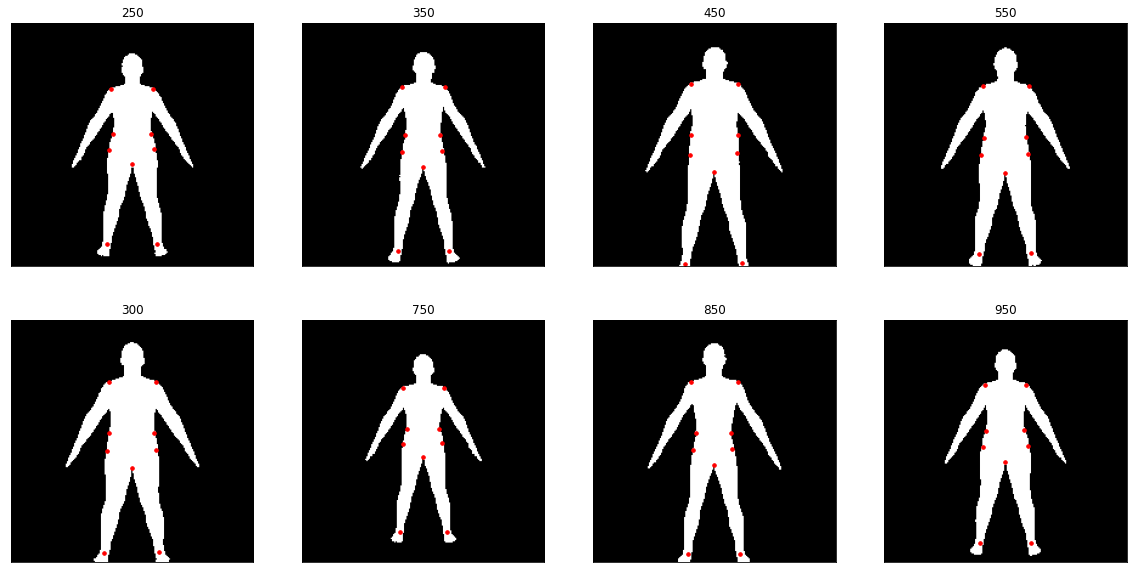

In [12]:
plot_idx=[250,350,450,550,300,750,850,950]
fig, axes = plt.subplots(2, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(plot_idx, IMG_TEST[idx,:,:], axes.ravel()):
  keypoints = predict_LR[:,idx,:]
  ax.imshow(IMG_TEST[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
idx=0
predict_matrix=np.empty((1000,2))
predict_Decisiontree=np.empty((9,1000,2))
while idx < 9:
  tree_X=DecisionTreeRegressor()
  tree_X = tree_X.fit(IMG_TRAIN_transform, KPT_TRAIN_X[:,idx])
  tree_y=DecisionTreeRegressor()
  tree_y = tree_y.fit(IMG_TRAIN_transform, KPT_TRAIN_y[:,idx])
  predict_X=tree_X.predict(IMG_TEST_transform)
  predict_y=tree_y.predict(IMG_TEST_transform)
  predict_matrix[:,0]=predict_X[:]
  predict_matrix[:,1]=predict_y[:]
  predict_Decisiontree[idx,:,:]=predict_matrix
  Xtree_scores=cross_val_score(tree_X,IMG_TRAIN_transform,KPT_TRAIN_X[:,idx],cv=kfold)
  ytree_scores=cross_val_score(tree_y,IMG_TRAIN_transform,KPT_TRAIN_y[:,idx],cv=kfold)
  print("X_label_scores:{}".format(Xtree_scores))
  print("y_label_scores:{}".format(ytree_scores))
  idx=idx+1

X_label_scores:[0.72147958 0.71751324 0.69734102]
y_label_scores:[0.95387255 0.95152927 0.95647794]
X_label_scores:[0.89359935 0.95976486 0.9516364 ]
y_label_scores:[0.98159244 0.9868068  0.98112691]
X_label_scores:[0.97518061 0.98135507 0.97830547]
y_label_scores:[0.70236506 0.68628689 0.72095586]
X_label_scores:[0.95607046 0.96222503 0.96972286]
y_label_scores:[0.92926701 0.94014033 0.91137043]
X_label_scores:[0.93589936 0.93247054 0.95233376]
y_label_scores:[0.98868238 0.99026815 0.98033586]
X_label_scores:[0.95318839 0.95941846 0.9652303 ]
y_label_scores:[0.97761279 0.97891606 0.97624946]
X_label_scores:[0.97786842 0.97693009 0.97800515]
y_label_scores:[0.7718272  0.66526004 0.69108444]
X_label_scores:[0.97436216 0.97179309 0.97593456]
y_label_scores:[0.93689091 0.91007382 0.91153343]
X_label_scores:[0.91920912 0.91669298 0.92847078]
y_label_scores:[0.98486279 0.9900561  0.97974234]


from cross-validation part, some coordinates' prediction effect is not good compared to linear regression

But if we evaluate the effect only by images, it's also pretty good

Evaluate the effect by images

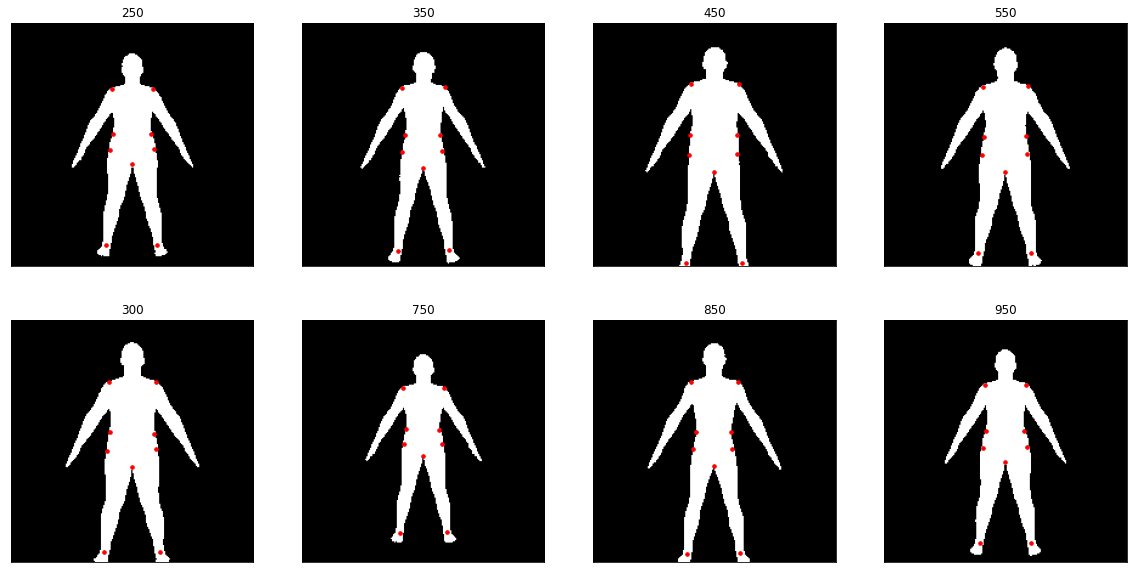

In [14]:
plot_idx=[250,350,450,550,300,750,850,950]
fig, axes = plt.subplots(2, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(plot_idx, IMG_TEST[idx,:,:], axes.ravel()):
  keypoints = predict_Decisiontree[:,idx,:]
  ax.imshow(IMG_TEST[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# SVM Regressor

In [15]:
from sklearn.svm import SVR
idx=0
predict_matrix=np.empty((1000,2))
predict_SVM=np.empty((9,1000,2))
while idx < 9:
  SVR_X = SVR(gamma=0.001).fit(IMG_TRAIN_transform, KPT_TRAIN_X[:,idx])
  SVR_y = SVR(gamma=0.001).fit(IMG_TRAIN_transform, KPT_TRAIN_y[:,idx])
  predict_X=SVR_X.predict(IMG_TEST_transform)
  predict_y=SVR_y.predict(IMG_TEST_transform)
  predict_matrix[:,0]=predict_X[:]
  predict_matrix[:,1]=predict_y[:]
  predict_SVM[idx,:,:]=predict_matrix
  XSVR_scores=cross_val_score(SVR_X,IMG_TRAIN_transform,KPT_TRAIN_X[:,idx],cv=kfold)
  ySVR_scores=cross_val_score(SVR_y,IMG_TRAIN_transform,KPT_TRAIN_y[:,idx],cv=kfold)
  print("X_label_scores:{}".format(XSVR_scores))
  print("y_label_scores:{}".format(ySVR_scores))
  idx=idx+1

X_label_scores:[0.87881933 0.88021907 0.89455055]
y_label_scores:[0.97397737 0.97054337 0.97855755]
X_label_scores:[0.97226108 0.9826223  0.98410474]
y_label_scores:[0.98891964 0.9854538  0.98193899]
X_label_scores:[0.96430554 0.9818616  0.9831113 ]
y_label_scores:[0.93130483 0.9330629  0.92554556]
X_label_scores:[0.97729601 0.98790034 0.98698555]
y_label_scores:[0.97750304 0.96941236 0.97570676]
X_label_scores:[0.97757431 0.98057114 0.97210009]
y_label_scores:[0.9628687  0.9545928  0.94745403]
X_label_scores:[0.97180328 0.98164334 0.98332008]
y_label_scores:[0.98797987 0.98459587 0.98001561]
X_label_scores:[0.96427937 0.9809607  0.98336876]
y_label_scores:[0.94325236 0.93969282 0.93491029]
X_label_scores:[0.97468266 0.98400456 0.97891198]
y_label_scores:[0.97845713 0.9692667  0.97550417]
X_label_scores:[0.97272296 0.97231785 0.96710901]
y_label_scores:[0.96327324 0.95508171 0.94852988]


the effect of SVM still shows good but the running time is so long

Evaluate the effect by images

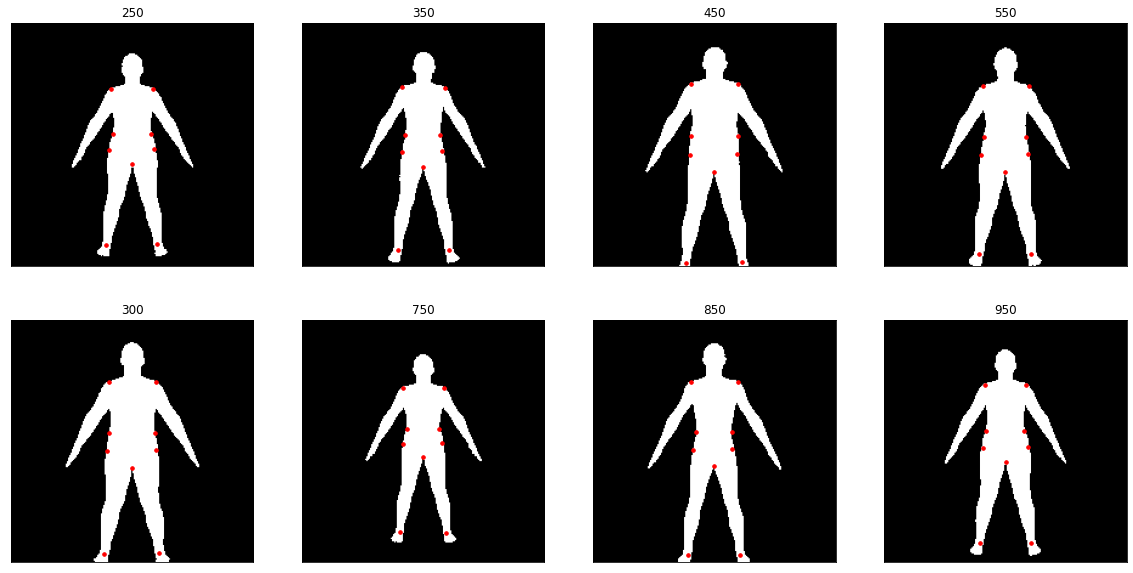

In [16]:
plot_idx=[250,350,450,550,300,750,850,950]
fig, axes = plt.subplots(2, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
IMG_SIZE=200
for idx, image, ax in zip(plot_idx, IMG_TEST[idx,:,:], axes.ravel()):
  keypoints = predict_SVM[:,idx,:]
  ax.imshow(IMG_TEST[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Task 2: Image Generation
In the previous task, we predict low dimensional data (keypoints 9x2) from high dimensional input (images 200x200). Let’s consider a different case now.

• Train a image generation model to predict silhouette images from keypoints. – Input: 9x2 keypoints coordinates
– Output: corresponding sihouette images

• All of the available data can be used, including the keypoints you predicted on imgs2.npy in the previous task.

• Predict silhouett images for keypoints in kpts3.npy.
– Visualize the generated image together with input keypoints.

# X_train

In [17]:
KPT_TRAIN_transform=np.reshape(KPT_TRAIN,(1000,-1))
print(KPT_TRAIN_transform.shape)

(1000, 18)


# y_train

In [18]:
print(IMG_TRAIN_transform.shape)
print(IMG_TRAIN_transform[:,0].shape)

(1000, 40000)
(1000,)


# Preprocess test data
use decision tree outcome in Task 1 as input data

In [19]:
# decision tree outcome in task 1 as test data
# the shape is 9*1000*2
print(predict_Decisiontree.shape) 

(9, 1000, 2)


In [20]:
# The goal is to transform the predict_Decisiontree(9,1000,2) to matrix_Decisiontree (1000,9,2)
# Then I can do the next step
matrix_Decisiontree=np.empty((1000,9,2))
i=0
while i<1000:
    idx=0
    while idx<9:
      matrix_Decisiontree[i,idx,:]=predict_Decisiontree[idx,i,:]
      idx=idx+1
    i=i+1
print(matrix_Decisiontree.shape)

(1000, 9, 2)


In [21]:
# transform the (1000,9,2) to (1000,18)
matrix_Decisiontree=np.reshape(matrix_Decisiontree,(1000,-1))
print(matrix_Decisiontree.shape)

(1000, 18)


# Decision tree classifier
In task 2 actually it's a classification problem comparing to task 1

We should predict the label for the black-white image only 0 or 1

So the model I used in task 2 is all classification model instead of regression model

In [0]:
from sklearn.tree import DecisionTreeClassifier
idx=0
DT_picture=np.empty((1000,40000))
while idx < 40000:
  tree_clf=DecisionTreeClassifier()
  tree_predict_clf = tree_clf.fit(KPT_TRAIN_transform, IMG_TRAIN_transform[:,idx])
  clf_tree=tree_predict_clf.predict(matrix_Decisiontree)
  DT_picture[:,idx]=clf_tree
  idx=idx+1

Transform the data for drawing

In [23]:
DT_Picture=np.reshape(DT_picture,(1000,200,-1))
print(DT_Picture.shape)
matrix_Decisiontree=np.reshape(matrix_Decisiontree,(1000,9,-1))
print(matrix_Decisiontree.shape)

(1000, 200, 200)
(1000, 9, 2)


# Evaluate the effect through image

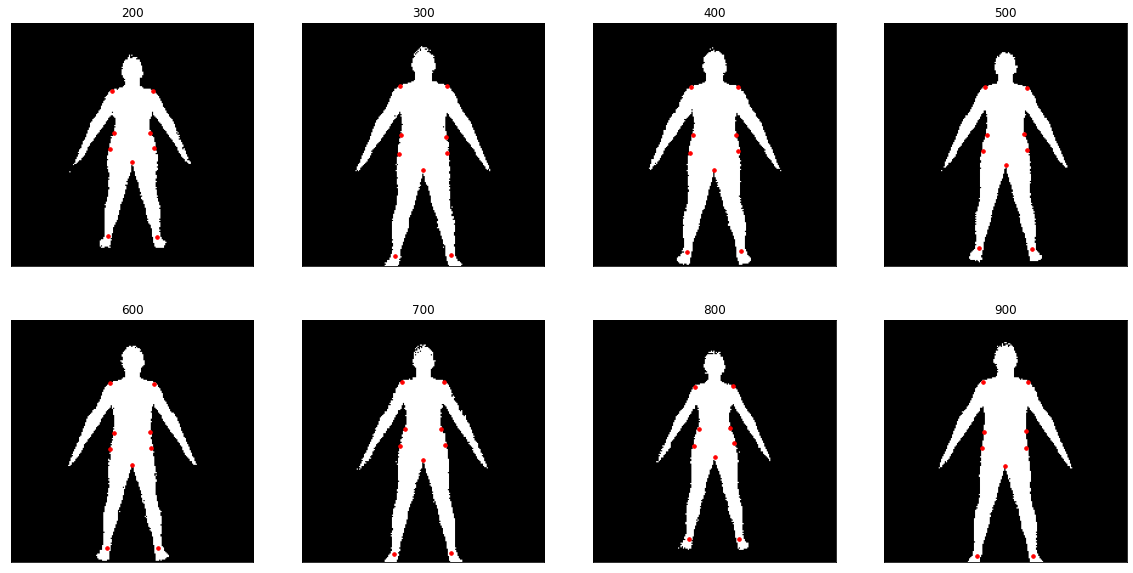

In [24]:
plot_idx=[200,300,400,500,600,700,800,900]
fig, axes = plt.subplots(2, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
idx=1
IMG_SIZE=200
for idx, image, ax in zip(plot_idx, DT_Picture[idx,:,:], axes.ravel()):
  keypoints = matrix_Decisiontree[idx,:,:]
  ax.imshow(DT_Picture[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

# Logistic Regression 

In [25]:
KPT_TRAIN_transform=np.reshape(KPT_TRAIN,(1000,-1))
print(KPT_TRAIN_transform.shape)
print(IMG_TRAIN_transform.shape)
print(IMG_TRAIN_transform[:,0].shape)
# first predict the shape of keypoints
print(predict_LR.shape)

(1000, 18)
(1000, 40000)
(1000,)
(9, 1000, 2)


In [26]:
# preprocess test data
matrxi_LR=np.empty((1000,9,2))
i=0
while i<1000:
    idx=0
    while idx<9:
      matrxi_LR[i,idx,:]=predict_LR[idx,i,:]
      idx=idx+1
    i=i+1
print(matrxi_LR.shape)

(1000, 9, 2)


In [27]:
# transform the (1000,9,2) to (1000,18)
matrxi_LR=np.reshape(matrxi_LR,(1000,-1))
print(matrxi_LR.shape)

(1000, 18)


In [28]:
# if we sort the image we will find according to column vector in 1000 images there are hardly 1 values
matrix_sort=IMG_TRAIN_transform[0,:]
print(np.where(matrix_sort==1))

(array([ 4298,  4299,  4300, ..., 39927, 39928, 39929]),)


In [0]:
# Logistic regression algorithm have to output 2 labels 
# If a column vector in 1000 images only has 1 label, then it will not work
# By viewing the matrix of IMG_TRAIN_transform[0,:], it shows that almost all the column vector has only one label
# We can't write the same code as decision tree classification

# When we do logistic regression we must do preprocess
#------------------------preprocess---------------------------------#
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(KPT_TRAIN_transform)
X_train_scaled=scaler.transform(KPT_TRAIN_transform)
X_test_scaled=scaler.transform(matrxi_LR)
#------------------------preprocess---------------------------------#
from sklearn.linear_model import LogisticRegression
idx=0
clf_LR=LogisticRegression()
matrix_LR_clf=np.empty((1000,40000))
while idx<40000:
  if (IMG_TRAIN_transform[:,idx]==0).all():
    LR_matrix=np.zeros([1000,])
  elif (IMG_TRAIN_transform[:,idx]==1).all():
    LR_matrix=np.ones([1000,])
  else:
    clf_LR_fit=clf_LR.fit(X_train_scaled,IMG_TRAIN_transform[:,idx])
    LR_matrix=clf_LR_fit.predict(X_test_scaled)
  matrix_LR_clf[:,idx]=LR_matrix
  idx=idx+1

In [30]:
matrix_LR_clf.shape

(1000, 40000)

In [31]:
matrix_LR_clf=np.reshape(matrix_LR_clf,(1000,200,-1))
print(matrix_LR_clf.shape)
matrxi_LR=np.reshape(matrxi_LR,(1000,9,-1))
print(matrxi_LR.shape)

(1000, 200, 200)
(1000, 9, 2)


# Evaluate the effect through image

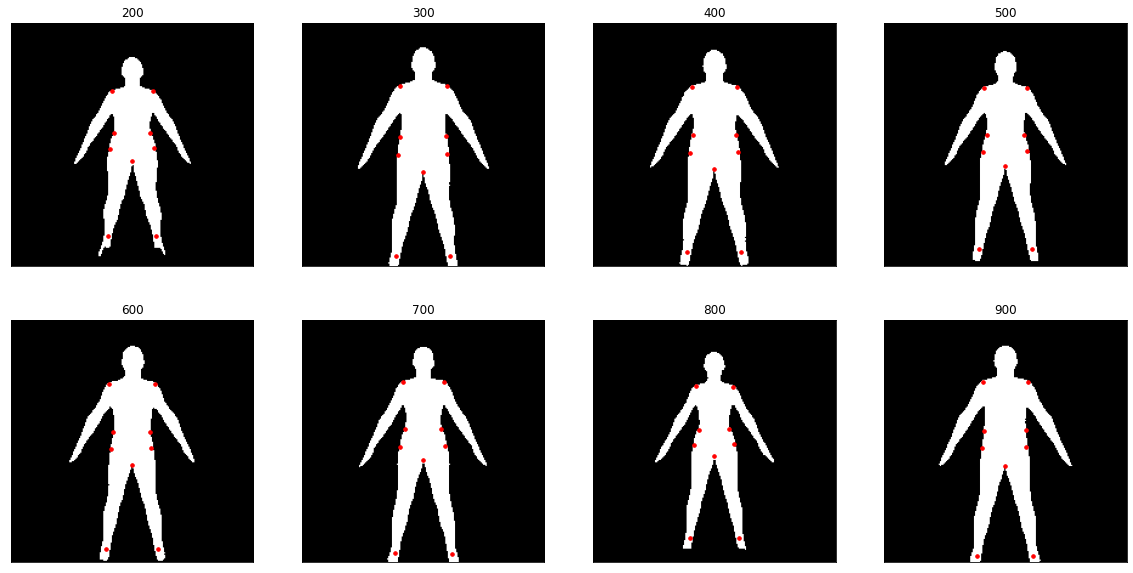

In [32]:
plot_idx=[200,300,400,500,600,700,800,900]
fig, axes = plt.subplots(2, 4, figsize=(20, 10),
subplot_kw={'xticks': (), 'yticks': ()})
ax=axes.ravel()
idx=1
IMG_SIZE=200
for idx, image, ax in zip(plot_idx, matrix_LR_clf[idx,:,:], axes.ravel()):
  keypoints = matrxi_LR[idx,:,:]
  ax.imshow(matrix_LR_clf[idx,:,:],cmap='gray')
  ax.scatter(keypoints[:, 0], keypoints[:, 1], s=50, marker='.', c='r')
  ax.set_title("{}".format(idx))

In [38]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [91.7 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bio

In [40]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/Assignment4.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 110 not upgraded.
[NbConvertApp] Converting notebook ./gdrive/My Drive/Colab Notebooks/MAEG5735-2020-Assignment4/Assignment4.ipynb to PDF
[NbConvertApp] Support files will be in Assignment4_files/
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Writing 69806 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] R